In [327]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [328]:
Value1=pd.read_csv("FFACapeOI 010118 190224.csv")
Value1.set_index("Date",inplace=True)
Value1.rename(columns={"Value":"FFACapeO010118"},inplace=True)

In [329]:
Value2=pd.read_csv("FFADV_C3 010118 190224.csv")
Value2.set_index("Date",inplace=True)
Value2.rename(columns={"Value":"C3010118"},inplace=True)

In [330]:

di_ex=["FFACapeOI 010118 190224.csv",
"FFADV_C3 010118 190224.csv",
"FFADV_C5 010118 190224.csv",
"FFADV_C5TC 010118 190224.csv",
"FFADV_C7 010118 190224.csv",
"FFADVCape_T 020707 190224.csv","ODV_C5TC 010118 190224.csv","OptionsCapeOI 010118 190224.csv"]

In [331]:
Value3=pd.read_csv("FFADV_C5 010118 190224.csv")
Value3.set_index("Date",inplace=True)
Value3.rename(columns={"Value":"C5010118"},inplace=True)

In [332]:
Value4=pd.read_csv("FFADV_C5TC 010118 190224.csv")
Value4.set_index("Date",inplace=True)
Value4.rename(columns={"Value":"C5TC010118"},inplace=True)

In [333]:
Value5=pd.read_csv("FFADVCape_T 020707 190224.csv")
Value5.set_index("Date",inplace=True)
Value5.rename(columns={"Value":"020707"},inplace=True)

In [334]:
Value6=pd.read_csv("ODV_C5TC 010118 190224.csv")
Value6.set_index("Date",inplace=True)
Value6.rename(columns={"Value":"010118"},inplace=True)

In [335]:
Value7=pd.read_csv("OptionsCapeOI 010118 190224.csv")
Value7.set_index("Date",inplace=True)
Value7.rename(columns={"Value":"CapeOI010118"},inplace=True)

In [336]:
df = pd.concat([Value1,Value2,Value3,Value4,Value5,Value6,Value7],axis=1)

In [337]:
df.reset_index(inplace=True)


In [338]:
df.head()

Date  FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
0  02/01/2018         54040.0       0.0       0.0       475.0   475.0    84.0   
1  08/01/2018         59753.0       0.0       0.0      1360.0  1360.0   180.0   
2  15/01/2018         63213.0       0.0      50.0       730.0   780.0   630.0   
3  22/01/2018         64229.0       0.0       0.0      1480.0  1540.0     0.0   
4  29/01/2018         65683.0       0.0       0.0       414.0   414.0  1395.0   

   CapeOI010118  
0       77208.0  
1       80202.0  
2       81912.0  
3       82662.0  
4       89262.0

In [339]:



df["Date"]=pd.to_datetime(df["Date"])

In [340]:
df = (df.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [341]:
df.set_index("Date",inplace=True)

In [342]:
df[df.index=='07/01/2020']

FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
Date                                                                         
2020-07-01        124002.0      50.0     220.0      2420.0  2690.0  4500.0   

            CapeOI010118  
Date                      
2020-07-01      168068.0

In [343]:
# df_M=df.resample("W").mean()

In [344]:
df_M=df

In [345]:
df_M.fillna(method="ffill",inplace=True)

In [346]:
df_M.tail()

FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
Date                                                                         
2023-12-09        187806.0       0.0      50.0      4462.0  4512.0   380.0   
2023-12-10        187806.0       0.0     200.0      4210.0  4410.0   630.0   
2023-12-11        187806.0       0.0     200.0      4210.0  4410.0   630.0   
2023-12-12        187806.0      75.0     500.0      5394.0  5969.0   420.0   
2023-12-13        187806.0       0.0       0.0      6433.0  6433.0  2880.0   

            CapeOI010118  
Date                      
2023-12-09      154653.0  
2023-12-10      154653.0  
2023-12-11      154653.0  
2023-12-12      154653.0  
2023-12-13      154653.0

In [347]:
Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)


In [348]:
Data_1.head()

Unnamed: 0  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  \
Date                                                                      
2014-06-02           0      13825.0     16590.0     19070.0     23014.0   
2014-06-03           1      15010.0     18002.0     20302.0     23880.0   
2014-06-04           2      15050.0     18052.0     20372.0     23850.0   
2014-06-05           3      14715.0     17748.0     20094.0     23630.0   
2014-06-06           4      14812.0     17762.0     20114.0     23700.0   

            5TC_C+4MON  5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  \
Date                                                               ...   
2014-06-02     25734.0           0    13825.0   19558.0   27098.0  ...   
2014-06-03     26872.0           0    15010.0   20728.0   28084.0  ...   
2014-06-04     27132.0           0    15050.0   20758.0   27971.0  ...   
2014-06-05     27382.0           0    14715.0   20491.0   27581.0  ...   
2014-06-06     27548.0           0    14812.0   20525.0   27650.0  ...   

            5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                           
2014-06-02   18853.0   24375.0   30023.0     21981.0     20808.0     20254.0   
2014-06-03   19230.0   24893.0   30483.0     22445.0     21051.0     20396.0   
2014-06-04   19220.0   24808.0   30588.0     22473.0     21001.0     20386.0   
2014-06-05   18918.0   24480.0   30370.0     22267.0     20900.0     20295.0   
2014-06-06   18958.0   24553.0   30473.0     22287.0     20940.0     20294.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2014-06-02     19745.0     19585.0     19418.0     19258.0  
2014-06-03     19836.0     19625.0     19458.0     19298.0  
2014-06-04     19826.0     19625.0     19458.0     19298.0  
2014-06-05     19695.0     19514.0     19357.0     19187.0  
2014-06-06     19695.0     19504.0     19579.0     19177.0  

[5 rows x 21 columns]

In [349]:
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)

In [350]:
Data=pd.concat([Data_2,Data_1,Data_3],axis=0)

In [351]:
Data=Data.iloc[:,1:]

In [352]:
Data

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
...                 ...         ...         ...         ...         ...   
2024-02-26      21043.0     25304.0     27514.0     27621.0     27264.0   
2024-02-27      21156.0     27396.0     28896.0     28921.0     27875.0   
2024-02-28      21461.0     30461.0     31236.0     30864.0     29329.0   
2024-02-29      30193.0     30811.0     30507.0     28986.0     27321.0   
2024-03-01      34911.0     34568.0     33179.0     31143.0     28893.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2019-01-02         0.0    14050.0   14242.0   16808.0   20358.0   15300.0   
2019-01-03         0.0    13508.0   13658.0   16483.0   20100.0   15150.0   
2019-01-04         0.0    13593.0   13704.0   16467.0   20083.0   15150.0   
2019-01-07         0.0    14447.0   14158.0   16817.0   20442.0   15208.0   
2019-01-08         0.0    14556.0   14258.0   16942.0   20442.0   15183.0   
...                ...        ...       ...       ...       ...       ...   
2024-02-26     26536.0    22304.0   27467.0   26464.0   26407.0   16093.0   
2024-02-27     27157.0    23039.0   28564.0   27204.0   27039.0   16379.0   
2024-02-28     28000.0    24162.0   30476.0   28125.0   27664.0   16736.0   
2024-02-29     27164.0    24105.0   30101.0   27093.0   26818.0   16443.0   
2024-03-01     28429.0    25678.0   32963.0   28211.0   27907.0   17050.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2019-01-02   15146.0   15683.0     15692.0     13342.0     13408.0   
2019-01-03   15025.0   15567.0     15508.0     13304.0     13396.0   
2019-01-04   15054.0   15592.0     15533.0     13317.0     13442.0   
2019-01-07   15192.0   15767.0     15717.0     13417.0     13475.0   
2019-01-08   15208.0   15783.0     15746.0     13417.0     13483.0   
...              ...       ...         ...         ...         ...   
2024-02-26   19871.0   22893.0     20907.0     19907.0     18936.0   
2024-02-27   20114.0   23171.0     21239.0     20114.0     19057.0   
2024-02-28   20600.0   23636.0     21736.0     20486.0     19436.0   
2024-02-29   20464.0   23514.0     21489.0     20350.0     19336.0   
2024-03-01   21121.0   24174.0     22143.0     20643.0     19539.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2019-01-02     13783.0     14050.0     14054.0     14054.0  
2019-01-03     13733.0     14033.0     14033.0     14033.0  
2019-01-04     13738.0     14046.0     14038.0     14038.0  
2019-01-07     13767.0     14075.0     14058.0     14058.0  
2019-01-08     13767.0     14075.0     14050.0     14050.0  
...                ...         ...         ...         ...  
2024-02-26     18443.0     18179.0     18107.0     18057.0  
2024-02-27     18543.0     18250.0     18164.0     18107.0  
2024-02-28     18829.0     18393.0     18300.0     18243.0  
2024-02-29     18814.0     18379.0     18300.0     18250.0  
2024-03-01     19021.0     18483.0     18350.0     18357.0  

[2541 rows x 20 columns]

In [353]:
Data.reset_index(inplace=True)

In [354]:
Data

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
0    2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
1    2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2    2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
3    2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
4    2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
...         ...          ...         ...         ...         ...         ...   
2536 2024-02-26      21043.0     25304.0     27514.0     27621.0     27264.0   
2537 2024-02-27      21156.0     27396.0     28896.0     28921.0     27875.0   
2538 2024-02-28      21461.0     30461.0     31236.0     30864.0     29329.0   
2539 2024-02-29      30193.0     30811.0     30507.0     28986.0     27321.0   
2540 2024-03-01      34911.0     34568.0     33179.0     31143.0     28893.0   

      5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  5TC_C+4Q  5TC_C+5Q  \
0            0.0    14050.0   14242.0   16808.0  ...   15300.0   15146.0   
1            0.0    13508.0   13658.0   16483.0  ...   15150.0   15025.0   
2            0.0    13593.0   13704.0   16467.0  ...   15150.0   15054.0   
3            0.0    14447.0   14158.0   16817.0  ...   15208.0   15192.0   
4            0.0    14556.0   14258.0   16942.0  ...   15183.0   15208.0   
...          ...        ...       ...       ...  ...       ...       ...   
2536     26536.0    22304.0   27467.0   26464.0  ...   16093.0   19871.0   
2537     27157.0    23039.0   28564.0   27204.0  ...   16379.0   20114.0   
2538     28000.0    24162.0   30476.0   28125.0  ...   16736.0   20600.0   
2539     27164.0    24105.0   30101.0   27093.0  ...   16443.0   20464.0   
2540     28429.0    25678.0   32963.0   28211.0  ...   17050.0   21121.0   

      5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
0      15683.0     15692.0     13342.0     13408.0     13783.0     14050.0   
1      15567.0     15508.0     13304.0     13396.0     13733.0     14033.0   
2      15592.0     15533.0     13317.0     13442.0     13738.0     14046.0   
3      15767.0     15717.0     13417.0     13475.0     13767.0     14075.0   
4      15783.0     15746.0     13417.0     13483.0     13767.0     14075.0   
...        ...         ...         ...         ...         ...         ...   
2536   22893.0     20907.0     19907.0     18936.0     18443.0     18179.0   
2537   23171.0     21239.0     20114.0     19057.0     18543.0     18250.0   
2538   23636.0     21736.0     20486.0     19436.0     18829.0     18393.0   
2539   23514.0     21489.0     20350.0     19336.0     18814.0     18379.0   
2540   24174.0     22143.0     20643.0     19539.0     19021.0     18483.0   

      5TC_C+6CAL  5TC_C+7CAL  
0        14054.0     14054.0  
1        14033.0     14033.0  
2        14038.0     14038.0  
3        14058.0     14058.0  
4        14050.0     14050.0  
...          ...         ...  
2536     18107.0     18057.0  
2537     18164.0     18107.0  
2538     18300.0     18243.0  
2539     18300.0     18250.0  
2540     18350.0     18357.0  

[2541 rows x 21 columns]

In [355]:
Data=Data.drop_duplicates()

In [356]:
Data_F = (Data.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [357]:
Data_F

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
0    2018-02-01      12160.0     14770.0     16340.0     16670.0     16950.0   
1    2018-02-02      12680.0     15760.0     16790.0     17120.0     17240.0   
2    2018-02-03      12680.0     15760.0     16790.0     17120.0     17240.0   
3    2018-02-04      12680.0     15760.0     16790.0     17120.0     17240.0   
4    2018-02-05      12380.0     15470.0     16640.0     17060.0     17130.0   
...         ...          ...         ...         ...         ...         ...   
2137 2023-12-09      32296.0     16164.0      9900.0     12075.0     13736.0   
2138 2023-12-10      32296.0     16164.0      9900.0     12075.0     13736.0   
2139 2023-12-11      33729.0     15950.0      9904.0     11964.0     13857.0   
2140 2023-12-12      36643.0     17921.0     10764.0     12604.0     14600.0   
2141 2023-12-13      35061.0     16000.0     10168.0     12107.0     14350.0   

      5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  5TC_C+4Q  5TC_C+5Q  \
0            0.0    13465.0   16653.0   18270.0  ...   13830.0   14830.0   
1            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
2            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
3            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
4            0.0    13925.0   16943.0   18630.0  ...   14060.0   15080.0   
...          ...        ...       ...       ...  ...       ...       ...   
2137     15557.0    27285.0   12713.0   15968.0  ...   19489.0   11643.0   
2138     15557.0    27285.0   12713.0   15968.0  ...   19489.0   11643.0   
2139     15657.0    27763.0   12606.0   16175.0  ...   19625.0   11779.0   
2140     16350.0    28734.0   13763.0   17057.0  ...   19986.0   12136.0   
2141     16136.0    28207.0   12758.0   16639.0  ...   19714.0   11943.0   

      5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
0      16790.0     16520.0     15530.0     15140.0     15000.0     15010.0   
1      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
2      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
3      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
4      16970.0     16790.0     15640.0     15210.0     15030.0     15030.0   
...        ...         ...         ...         ...         ...         ...   
2137   15550.0     16750.0     16171.0     16446.0     16450.0     16393.0   
2138   15550.0     16750.0     16171.0     16446.0     16450.0     16393.0   
2139   15629.0     16821.0     16200.0     16436.0     16443.0     16386.0   
2140   15971.0     17534.0     16554.0     16657.0     16629.0     16543.0   
2141   15779.0     17030.0     16271.0     16604.0     16604.0     16507.0   

      5TC_C+6CAL  5TC_C+7CAL  
0        15490.0     15530.0  
1        15510.0     15540.0  
2        15510.0     15540.0  
3        15510.0     15540.0  
4        15520.0     15540.0  
...          ...         ...  
2137     16307.0     16307.0  
2138     16307.0     16307.0  
2139     16279.0     16279.0  
2140     16421.0     16400.0  
2141     16386.0     16371.0  

[2142 rows x 21 columns]

In [358]:
Data_F.set_index("Date",inplace=True)

In [359]:
Data_F.head(10)

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2018-02-01      12160.0     14770.0     16340.0     16670.0     16950.0   
2018-02-02      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-03      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-04      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-05      12380.0     15470.0     16640.0     17060.0     17130.0   
2018-02-06      13430.0     16380.0     17410.0     17450.0     17430.0   
2018-02-07      13220.0     16320.0     17350.0     17500.0     17500.0   
2018-02-08      13850.0     16860.0     18010.0     17720.0     17670.0   
2018-02-09      14350.0     16970.0     18150.0     17780.0     17710.0   
2018-02-10      14350.0     16970.0     18150.0     17780.0     17710.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2018-02-01         0.0    13465.0   16653.0   18270.0   21480.0   13830.0   
2018-02-02         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-03         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-04         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-05         0.0    13925.0   16943.0   18630.0   21790.0   14060.0   
2018-02-06         0.0    14905.0   17430.0   18870.0   21940.0   14240.0   
2018-02-07         0.0    14770.0   17450.0   18950.0   22230.0   14380.0   
2018-02-08         0.0    15355.0   17800.0   19050.0   22310.0   14530.0   
2018-02-09         0.0    15660.0   17880.0   19070.0   22360.0   14560.0   
2018-02-10         0.0    15660.0   17880.0   19070.0   22360.0   14560.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2018-02-01   14830.0   16790.0     16520.0     15530.0     15140.0   
2018-02-02   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-03   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-04   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-05   15080.0   16970.0     16790.0     15640.0     15210.0   
2018-02-06   15180.0   17070.0     16940.0     15730.0     15270.0   
2018-02-07   15260.0   17200.0     17040.0     15740.0     15250.0   
2018-02-08   15350.0   17330.0     17090.0     15910.0     15310.0   
2018-02-09   15400.0   17360.0     17140.0     15960.0     15332.0   
2018-02-10   15400.0   17360.0     17140.0     15960.0     15332.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2018-02-01     15000.0     15010.0     15490.0     15530.0  
2018-02-02     15010.0     15020.0     15510.0     15540.0  
2018-02-03     15010.0     15020.0     15510.0     15540.0  
2018-02-04     15010.0     15020.0     15510.0     15540.0  
2018-02-05     15030.0     15030.0     15520.0     15540.0  
2018-02-06     15160.0     15150.0     15530.0     15550.0  
2018-02-07     15180.0     15190.0     15540.0     15560.0  
2018-02-08     15220.0     15220.0     15570.0     15590.0  
2018-02-09     15250.0     15250.0     15570.0     15590.0  
2018-02-10     15250.0     15250.0     15570.0     15590.0

In [360]:
Data_2= Data_F.loc[:,~Data_F.columns.duplicated()]

In [322]:
Data_2.shape

(2142, 20)

In [323]:
# Data_W=Data_2.resample("W-Sun").mean()

In [324]:
Data_W=Data_2

In [325]:
# Data_W.drop("BRXMCOA.",axis=1,inplace=True)

In [326]:
Data_W.tail()

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2023-12-09      32296.0     16164.0      9900.0     12075.0     13736.0   
2023-12-10      32296.0     16164.0      9900.0     12075.0     13736.0   
2023-12-11      33729.0     15950.0      9904.0     11964.0     13857.0   
2023-12-12      36643.0     17921.0     10764.0     12604.0     14600.0   
2023-12-13      35061.0     16000.0     10168.0     12107.0     14350.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2023-12-09     15557.0    27285.0   12713.0   15968.0   18829.0   19489.0   
2023-12-10     15557.0    27285.0   12713.0   15968.0   18829.0   19489.0   
2023-12-11     15657.0    27763.0   12606.0   16175.0   18879.0   19625.0   
2023-12-12     16350.0    28734.0   13763.0   17057.0   19329.0   19986.0   
2023-12-13     16136.0    28207.0   12758.0   16639.0   19007.0   19714.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2023-12-09   11643.0   15550.0     16750.0     16171.0     16446.0   
2023-12-10   11643.0   15550.0     16750.0     16171.0     16446.0   
2023-12-11   11779.0   15629.0     16821.0     16200.0     16436.0   
2023-12-12   12136.0   15971.0     17534.0     16554.0     16657.0   
2023-12-13   11943.0   15779.0     17030.0     16271.0     16604.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2023-12-09     16450.0     16393.0     16307.0     16307.0  
2023-12-10     16450.0     16393.0     16307.0     16307.0  
2023-12-11     16443.0     16386.0     16279.0     16279.0  
2023-12-12     16629.0     16543.0     16421.0     16400.0  
2023-12-13     16604.0     16507.0     16386.0     16371.0

In [201]:
Data_new=pd.concat([Data_W,df_M],axis=1)

In [202]:
Data_new.isnull().sum()

5TC_CCURMON       0
5TC_C+1MON        0
5TC_C+2MON        0
5TC_C+3MON        0
5TC_C+4MON        0
5TC_C+5MON        0
5TC_CCURQ         0
5TC_C+1Q          0
5TC_C+2Q          0
5TC_C+3Q          0
5TC_C+4Q          0
5TC_C+5Q          0
5TC_C+6Q          0
5TC_C+1CAL        0
5TC_C+2CAL        0
5TC_C+3CAL        0
5TC_C+4CAL        0
5TC_C+5CAL        0
5TC_C+6CAL        0
5TC_C+7CAL        0
FFACapeO010118    0
C3010118          0
C5010118          0
C5TC010118        0
020707            0
010118            0
CapeOI010118      0
dtype: int64

In [203]:
Tar=pd.read_excel("Copy of BCI - C5TC.xlsx")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)



Tag_f=Target.resample("W-SUN").mean()

Tag_f.isnull().sum()

Value    0
dtype: int64

In [204]:
Tag_f.fillna(method="ffill",inplace=True)

In [205]:
Tag_f["shift_4"]=Tag_f["Value"].shift(-4)

In [206]:
# Tag_f["shift_2"]=Tag_f["Value"].shift(-2)

In [207]:
cor={}
for i in range(len(Tag_f.columns)):   
    cor[Tag_f.columns[i]]=Tag_f["shift_4"].corr(Tag_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [208]:
Imp_f= {k:v for k,v in cor.items() if v>.60 or v<-.63}
len(Imp_f)

2

In [209]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [210]:
keys

['Value', 'shift_4']

In [211]:
Data_new.fillna(method="ffill")

5TC_CCURMON    5TC_C+1MON    5TC_C+2MON    5TC_C+3MON  \
Date                                                                 
2018-02-04  12550.000000  15512.500000  16677.500000  17007.500000   
2018-02-11  13704.285714  16562.857143  17694.285714  17581.428571   
2018-02-18  13035.714286  16048.571429  17661.428571  17481.428571   
2018-02-25  12987.142857  16567.142857  18900.000000  18472.857143   
2018-03-04  14391.428571  17017.142857  17928.571429  17986.428571   
...                  ...           ...           ...           ...   
2023-11-19  20233.000000  17023.714286  11639.142857   7338.428571   
2023-11-26  21134.142857  19484.285714  13772.571429   8661.285714   
2023-12-03  31274.428571  22428.714286  13113.857143  11468.142857   
2023-12-10  32528.857143  15778.428571   9779.000000  11963.142857   
2023-12-17  35144.333333  16623.666667  10278.666667  12225.000000   

              5TC_C+4MON    5TC_C+5MON     5TC_CCURQ      5TC_C+1Q  \
Date                                                                 
2018-02-04  17167.500000      0.000000  14031.250000  16950.750000   
2018-02-11  17551.428571      0.000000  15133.571429  17609.000000   
2018-02-18  17532.857143      0.000000  14542.142857  17558.571429   
2018-02-25  18442.857143      0.000000  14777.142857  18605.142857   
2018-03-04  18427.142857      0.000000  14721.428571  17915.142857   
...                  ...           ...           ...           ...   
2023-11-19  10434.714286  12278.285714  20938.000000   9804.285714   
2023-11-26  11403.714286  12967.571429  22058.285714  11279.000000   
2023-12-03  13490.714286  14885.857143  27179.714286  13750.714286   
2023-12-10  13521.428571  15276.571429  27362.857143  12506.857143   
2023-12-17  14269.000000  16047.666667  28234.666667  13042.333333   

                5TC_C+2Q      5TC_C+3Q  ...    5TC_C+5CAL    5TC_C+6CAL  \
Date                                    ...                               
2018-02-04  18502.500000  21652.500000  ...  15017.500000  15505.000000   
2018-02-11  18958.571429  22192.857143  ...  15191.428571  15552.857143   
2018-02-18  18802.857143  22447.142857  ...  15202.857143  15527.142857   
2018-02-25  19694.285714  23458.571429  ...  15327.142857  15612.857143   
2018-03-04  19327.857143  23607.142857  ...  15302.857143  15585.714286   
...                  ...           ...  ...           ...           ...   
2023-11-19  14230.857143  17311.285714  ...  15819.857143  15823.571429   
2023-11-26  15060.428571  18123.428571  ...  15924.285714  15883.714286   
2023-12-03  16478.000000  19299.428571  ...  16347.857143  16190.857143   
2023-12-10  15729.571429  18661.428571  ...  16381.571429  16275.428571   
2023-12-17  16623.666667  19071.666667  ...  16478.666667  16362.000000   

              5TC_C+7CAL  FFACapeO010118   C3010118    C5010118   C5TC010118  \
Date                                                                           
2018-02-04  15537.500000    54040.000000   0.000000   12.500000   638.750000   
2018-02-11  15572.857143    62860.000000   0.000000    2.857143  1954.285714   
2018-02-18  15564.285714    66388.000000   0.000000    0.000000  1043.571429   
2018-02-25  15662.857143    64999.000000   0.000000   32.142857  1218.000000   
2018-03-04  15625.714286    67013.285714   0.000000   21.428571  1954.142857   
...                  ...             ...        ...         ...          ...   
2023-11-19  15808.000000   170528.000000   0.000000  546.428571  6389.428571   
2023-11-26  15872.714286   177120.000000   0.000000  351.428571  9497.000000   
2023-12-03  16181.714286   190389.000000  31.428571  392.857143  7529.428571   
2023-12-10  16276.428571   188544.000000   3.571429  289.285714  3921.000000   
2023-12-17  16350.000000   187806.000000  25.000000  233.333333  5345.666667   

                 020707       010118   CapeOI010118  
Date                                                 
2018-02-04   848.750000    21.000000   77208.000000  
2018-02-11  

In [212]:
Final=pd.concat([Data_new,Tag_f[keys]],axis=1)

In [213]:
Final.isnull().sum()

5TC_CCURMON       0
5TC_C+1MON        0
5TC_C+2MON        0
5TC_C+3MON        0
5TC_C+4MON        0
5TC_C+5MON        0
5TC_CCURQ         0
5TC_C+1Q          0
5TC_C+2Q          0
5TC_C+3Q          0
5TC_C+4Q          0
5TC_C+5Q          0
5TC_C+6Q          0
5TC_C+1CAL        0
5TC_C+2CAL        0
5TC_C+3CAL        0
5TC_C+4CAL        0
5TC_C+5CAL        0
5TC_C+6CAL        0
5TC_C+7CAL        0
FFACapeO010118    0
C3010118          0
C5010118          0
C5TC010118        0
020707            0
010118            0
CapeOI010118      0
Value             0
shift_4           4
dtype: int64

In [214]:
Data_f=Final.iloc[:-4,:]

In [215]:
Data_f.isnull().sum()

5TC_CCURMON       0
5TC_C+1MON        0
5TC_C+2MON        0
5TC_C+3MON        0
5TC_C+4MON        0
5TC_C+5MON        0
5TC_CCURQ         0
5TC_C+1Q          0
5TC_C+2Q          0
5TC_C+3Q          0
5TC_C+4Q          0
5TC_C+5Q          0
5TC_C+6Q          0
5TC_C+1CAL        0
5TC_C+2CAL        0
5TC_C+3CAL        0
5TC_C+4CAL        0
5TC_C+5CAL        0
5TC_C+6CAL        0
5TC_C+7CAL        0
FFACapeO010118    0
C3010118          0
C5010118          0
C5TC010118        0
020707            0
010118            0
CapeOI010118      0
Value             0
shift_4           0
dtype: int64

In [216]:
Data_f.shape

(303, 29)

In [217]:
Data_f.dropna(axis=1,inplace=True)

In [218]:
Data_f.shape

(303, 29)

In [219]:
f_c=list(Data_f.columns)

In [223]:
f_c.remove("shift_4")

In [224]:
f_c[-10:]

['5TC_C+6CAL',
 '5TC_C+7CAL',
 'FFACapeO010118',
 'C3010118',
 'C5010118',
 'C5TC010118',
 '020707',
 '010118',
 'CapeOI010118',
 'Value']

In [226]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_4"].corr(Data_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [227]:
Data_f.shape

(303, 29)

In [228]:
Imp_f= {k:v for k,v in cor.items() if v>.60 or v<-.60}
len(Imp_f)

6

In [229]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [230]:
sorted_dict

{'shift_4': 1.0,
 '5TC_C+1MON': 0.6967596457005452,
 '5TC_CCURQ': 0.6546377529806369,
 'Value': 0.6392041653213081,
 '5TC_C+2MON': 0.6309438976402015,
 '5TC_CCURMON': 0.6294641659307209}

In [231]:
Data_f=Data_f[keys]

In [232]:
Data_f.shape

(303, 6)

In [235]:
f_c=list(Data_f.columns)

f_c.remove("shift_4")

In [236]:
len(f_c)

5

In [237]:
for i in f_c:
    Data_f[i+"_fshift_1"]=Data_f[i].shift(+1)
    Data_f[i+"_fshift_2"]=Data_f[i].shift(+2)
    Data_f[i+"_fshift_3"]=Data_f[i].shift(+3)
    Data_f[i+"_fshift_4"]=Data_f[i].shift(+4)
    Data_f[i+"_fshift_5"]=Data_f[i].shift(+5)
    Data_f[i+"_fshift_6"]=Data_f[i].shift(+6)
    Data_f[i+"_fshift_7"]=Data_f[i].shift(+7)
    Data_f[i+"_fshift_8"]=Data_f[i].shift(+8)

In [238]:
for i in f_c:
    Data_f[i+"_rollm_3"]=Data_f[i].rolling(3).mean()
    Data_f[i+"_rollm_4"]=Data_f[i].rolling(4).mean()
    Data_f[i+"_rollm_6"]=Data_f[i].rolling(6).mean()
    Data_f[i+"_rollm_8"]=Data_f[i].rolling(8).mean()

In [239]:
for i in f_c:
    Data_f[i+"_ewm_3"]=Data_f[i].ewm(3).mean()
    Data_f[i+"_ewm_4"]=Data_f[i].ewm(4).mean()
    Data_f[i+"_ewm_6"]=Data_f[i].ewm(6).mean()
    Data_f[i+"_ewm_8"]=Data_f[i].ewm(8).mean()

In [240]:
for i in f_c: 
            Data_f[i+"_Delta_1"]=Data_f[i]-Data_f[i].shift(1)
            Data_f[i+"_Delta_2"]=Data_f[i]-Data_f[i].shift(2)
            Data_f[i+"_Delta_3"]=Data_f[i]-Data_f[i].shift(3)
            Data_f[i+"_Delta_4"]=Data_f[i]-Data_f[i].shift(4)
            Data_f[i+"_Delta_6"]=Data_f[i]-Data_f[i].shift(6)
                

In [241]:
for i in f_c:
    Data_f[i+"c"]=Data_f[i].shift(1)-Data_f[i].shift(2)
    Data_f[i+"_Delta_1_3"]=Data_f[i].shift(1)-Data_f[i].shift(3)
    Data_f[i+"_Delta_1_4"]=Data_f[i].shift(1)-Data_f[i].shift(4)
    Data_f[i+"_Delta_2_3"]=Data_f[i].shift(2)-Data_f[i].shift(3)
    Data_f[i+"_Delta_2_4"]=Data_f[i].shift(2)-Data_f[i].shift(4)

In [242]:
def calc_slope(x):
    slope=np.polyfit(range(len(x)),x,1)[0]
    return(slope)

for i in f_c:
    Data_f[i+"Slope_3shift"]=Data_f[i].rolling(3).apply(calc_slope)
    Data_f[i+"Slope_4shift"]=Data_f[i].rolling(4).apply(calc_slope)
    Data_f[i+"Slope_6shift"]=Data_f[i].rolling(6).apply(calc_slope)
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)

In [243]:
Data_f.reset_index(inplace=True)

In [244]:
from math import ceil
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

Data_f["week_of_month"]=Data_f["Date"].apply(week_of_month)

Data_f["week"]=Data_f["Date"].dt.weekofyear

Data_f['Month'] = Data_f['Date'].apply(lambda time: time.month)
Data_f['Day of Week'] = Data_f['Date'].apply(lambda time: time.dayofweek)
Data_f['Year'] = Data_f['Date'].apply(lambda t: t.year)
Data_f['Day'] = Data_f['Date'].apply(lambda t: t.day)

In [245]:
Data_f.head()

Date   5TC_CCURMON    5TC_C+1MON    5TC_C+2MON     5TC_CCURQ  \
0 2018-02-04  12550.000000  15512.500000  16677.500000  14031.250000   
1 2018-02-11  13704.285714  16562.857143  17694.285714  15133.571429   
2 2018-02-18  13035.714286  16048.571429  17661.428571  14542.142857   
3 2018-02-25  12987.142857  16567.142857  18900.000000  14777.142857   
4 2018-03-04  14391.428571  17017.142857  17928.571429  14721.428571   

          Value       shift_4  5TC_CCURMON_fshift_1  5TC_CCURMON_fshift_2  \
0  11473.000000  12632.000000                   NaN                   NaN   
1  13037.142857  11899.285714          12550.000000                   NaN   
2  13103.142857  10163.714286          13704.285714          12550.000000   
3  13241.142857   9026.142857          13035.714286          13704.285714   
4  12632.000000   8665.571429          12987.142857          13035.714286   

   5TC_CCURMON_fshift_3  ...  ValueSlope_3shift  ValueSlope_4shift  \
0                   NaN  ...                NaN                NaN   
1                   NaN  ...                NaN                NaN   
2                   NaN  ...         815.071429                NaN   
3          12550.000000  ...         102.000000         537.042857   
4          13704.285714  ...        -235.571429        -107.742857   

   ValueSlope_6shift  ValueSlope_8shift  week_of_month  week  Month  \
0                NaN                NaN              1     5      2   
1                NaN                NaN              2     6      2   
2                NaN                NaN              3     7      2   
3                NaN                NaN              4     8      2   
4                NaN                NaN              1     9      3   

   Day of Week  Year  Day  
0            6  2018    4  
1            6  2018   11  
2            6  2018   18  
3            6  2018   25  
4            6  2018    4  

[5 rows x 163 columns]

In [246]:
# Data_f.to_csv("Capesize_lagged_19-23.csv")

In [247]:
# Data_f=pd.read_csv("Capesize_lagged_19-23.csv")


In [248]:
Data_f.set_index("Date",inplace=True)

In [249]:
Data_f=Data_f.iloc[8:,:]

In [250]:
# Data_f.dropna(thresh=68,axis=1,inplace=True)

In [251]:
Data_f.fillna(method="ffill",inplace=True)

In [252]:
Data_f.isnull().sum()

5TC_CCURMON    0
5TC_C+1MON     0
5TC_C+2MON     0
5TC_CCURQ      0
Value          0
              ..
week           0
Month          0
Day of Week    0
Year           0
Day            0
Length: 162, dtype: int64

In [253]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_4"].corr(Data_f.iloc[:,i])

In [254]:
Imp_f= {k:v for k,v in cor.items() if v>=.60 or v<=-.60}
len(Imp_f)

29

In [255]:
Tag_f["Value"].corr(Final['CapeOI010118'])

-0.1630352297267345

In [258]:
sorted_dict

{'shift_4': 0.9999999999999999,
 '5TC_C+1MON': 0.6964956986392695,
 '5TC_C+1MON_rollm_3': 0.6786744447072844,
 '5TC_C+1MON_rollm_4': 0.6745398254755499,
 '5TC_C+1MON_fshift_1': 0.6614777651919054,
 '5TC_C+1MON_rollm_6': 0.6600794227894214,
 '5TC_C+1MON_ewm_3': 0.6536903981916543,
 '5TC_CCURQ': 0.6517442018011275,
 '5TC_C+1MON_fshift_2': 0.6434729643776071,
 'Value': 0.6355099492634523,
 '5TC_C+2MON_rollm_4': 0.6333697954002232,
 '5TC_C+2MON': 0.6321563314006146,
 '5TC_C+1MON_ewm_4': 0.6316154612410888,
 '5TC_C+2MON_rollm_3': 0.6315766997778403,
 '5TC_C+1MON_rollm_8': 0.630807583963627,
 '5TC_C+2MON_rollm_6': 0.6297790062697982,
 '5TC_CCURMON': 0.6260176963554663,
 '5TC_C+1MON_fshift_3': 0.6258407029612455,
 '5TC_C+2MON_ewm_3': 0.6235617024574281,
 '5TC_C+2MON_fshift_1': 0.6206611923397944,
 '5TC_C+2MON_fshift_2': 0.6196755917370635,
 '5TC_CCURQ_rollm_3': 0.6145005877298877,
 '5TC_C+2MON_fshift_3': 0.6141699396842952,
 '5TC_C+2MON_rollm_8': 0.6140138359767701,
 '5TC_C+2MON_ewm_4': 0.609

In [259]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [260]:
X_Final=Data_f[keys]

In [261]:
X_Final.fillna(method="ffill",inplace=True)

In [262]:
X_Final.shape

(295, 29)

In [263]:
X_Final.tail()

5TC_CCURMON    5TC_C+1MON    5TC_C+2MON     5TC_CCURQ  \
Date                                                                 
2023-10-22  26630.142857  19783.428571  16110.428571  20841.142857   
2023-10-29  25975.714286  16730.000000  14564.000000  19089.714286   
2023-11-05  16869.000000  14153.142857  10084.714286  18318.428571   
2023-11-12  18355.714286  15302.857143  10278.285714  19738.428571   
2023-11-19  20233.000000  17023.714286  11639.142857  20938.000000   

                   Value       shift_4  5TC_C+1MON_fshift_1  \
Date                                                          
2023-10-22  29770.571429  22164.000000         19247.000000   
2023-10-29  22312.714286  24336.428571         19783.428571   
2023-11-05  16932.571429  44283.571429         16730.000000   
2023-11-12  20517.000000  41072.571429         14153.142857   
2023-11-19  22164.000000  36756.000000         15302.857143   

            5TC_C+1MON_fshift_2  5TC_C+1MON_fshift_3  5TC_C+2MON_fshift_1  \
Date                                                                        
2023-10-22         19403.714286         18981.714286         16124.714286   
2023-10-29         19247.000000         19403.714286         16110.428571   
2023-11-05         19783.428571         19247.000000         14564.000000   
2023-11-12         16730.000000         19783.428571         10084.714286   
2023-11-19         14153.142857         16730.000000         10278.285714   

            ...  5TC_C+2MON_rollm_3  5TC_C+2MON_rollm_4  5TC_C+2MON_rollm_6  \
Date        ...                                                               
2023-10-22  ...        16160.142857        16346.500000        16695.380952   
2023-10-29  ...        15599.714286        15761.107143        16278.785714   
2023-11-05  ...        13586.380952        14220.964286        15005.785714   
2023-11-12  ...        11642.333333        12759.357143        13901.238095   
2023-11-19  ...        10667.380952        11641.535714        13133.547619   

            5TC_C+2MON_rollm_8  5TC_CCURQ_rollm_3  Value_rollm_3  \
Date                                                               
2023-10-22        16513.196429       20260.000000   27521.761905   
2023-10-29        16424.750000       20029.476190   26629.380952   
2023-11-05        15602.625000       19416.428571   23005.285714   
2023-11-12        14754.464286       19048.857143   19920.761905   
2023-11-19        13994.017857       19664.952381   19871.190476   

            5TC_C+1MON_ewm_3  5TC_C+1MON_ewm_4  5TC_C+2MON_ewm_3  \
Date                                                               
2023-10-22      18411.740030      18022.392120      16427.657839   
2023-10-29      17991.305023      17763.913696      15961.743380   
2023-11-05      17031.764481      17041.759528      14492.486106   
2023-11-12      16599.537647      16693.979051      13438.936008   
2023-11-19      16705.581806      16759.926098      12988.987720   

            5TC_C+2MON_ewm_4  
Date                          
2023-10-22      16470.214590  
2023-10-29      16088.971672  
2023-11-05      14888.120195  
2023-11-12      13966.153299  
2023-11-19      13500.751211  

[5 rows x 29 columns]

In [264]:
X_Final.dropna(thresh=60,axis=1,inplace=True)

In [265]:
Data_f.columns

Index(['5TC_CCURMON', '5TC_C+1MON', '5TC_C+2MON', '5TC_CCURQ', 'Value',
       'shift_4', '5TC_CCURMON_fshift_1', '5TC_CCURMON_fshift_2',
       '5TC_CCURMON_fshift_3', '5TC_CCURMON_fshift_4',
       ...
       'ValueSlope_3shift', 'ValueSlope_4shift', 'ValueSlope_6shift',
       'ValueSlope_8shift', 'week_of_month', 'week', 'Month', 'Day of Week',
       'Year', 'Day'],
      dtype='object', length=162)

In [266]:
X_Final=pd.concat([X_Final,Data_f[["Month","week"]]],axis=1)

In [267]:
X_Final.dropna(thresh=66,axis=1,inplace=True)

In [268]:
X_Final.fillna(method="ffill",inplace=True)

In [269]:
# X_Final.fillna(0,inplace=True)
X_Final[X_Final["UCOEXOT_ewm_4"].isnull()==False]["UCOEXOT_ewm_4"]

KeyError: 'UCOEXOT_ewm_4'

In [270]:
Tag_f.head

<bound method NDFrame.head of                    Value       shift_4
Date                                  
2018-02-04  11473.000000  12632.000000
2018-02-11  13037.142857  11899.285714
2018-02-18  13103.142857  10163.714286
2018-02-25  13241.142857   9026.142857
2018-03-04  12632.000000   8665.571429
...                  ...           ...
2023-11-19  22164.000000  36756.000000
2023-11-26  24336.428571           NaN
2023-12-03  44283.571429           NaN
2023-12-10  41072.571429           NaN
2023-12-17  36756.000000           NaN

[307 rows x 2 columns]>

In [271]:
# columns=['MRYAB03', 'BREXPIOCA', 'shift_4', 'BREXPIOCA_fshift_1',
#        'BREXPIOCA_fshift_2', 'BREXPIOCA_fshift_3', 'BREXPIOCA_rollm_3', 'BREXPIOCA_rollm_4',
#        'BREXPIOCA_rollm_6', 'BREXPIOCA_rollm_8',
#        'CHCN.G.MM_ewm_4', 'CHCN.G.MM_ewm_6', 'CHCN.G.MM_ewm_8',
#        'BREXPIOCA_ewm_3', 'BREXPIOCA_ewm_4', 'SHJGXCN_ewm_8', 'UCOEXOT_ewm_3',
#        'UCOEXOT_ewm_4']

In [272]:
X_Final.dropna(thresh=204,axis=1,inplace=True)

In [273]:
X_Final.shape

(295, 31)

In [274]:
Data_f=Data_f[keys]

In [276]:
exp_reg102 = setup(data =X_Final.iloc[:X_Final.shape[0]-50,:], target = 'shift_4', session_id=124,normalize=True,remove_multicollinearity=True,multicollinearity_threshold=.95) 

In [189]:
X_Final.isnull().sum()

5TC_CCURMON                            0
5TC_C+1MON                             0
5TC_C+2MON                             0
5TC_CCURQ                              0
Value                                  0
                                      ..
EMA_Value_ewm_3-Value_ewm_180_ewm_4    0
EMA_Value_ewm_3-Value_ewm_210_ewm_3    0
EMA_Value_ewm_3-Value_ewm_210_ewm_4    0
Month                                  0
week                                   0
Length: 100, dtype: int64

In [190]:
compare_models()

Initiated  . . . . . . . . . . . . . . . . . .          14:41:27
Status     . . . . . . . . . . . . . . . . . .  Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Ridge Regression

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/ggjps0806p/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1595, in _get_outputs
    yield from self._retrieve()
  File "/home/ggjps0806p/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1707, in _retrieve
    time.sleep(0.01)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-190-9ff5ccfe3077>", line 1, in <module>
    compare_models()
  File "/home/ggjps0806p/.local/lib/python3.8/site-packages/pycaret/utils/generic.py", line 965, in wrapper
    return func(*args, **kwargs)
  File "/home/ggjps0806p/.local/lib/python3.8/site-packages/pycaret/regression/functional.py", line 805, in compare_models
    return _CURRENT_EXPERIMENT.compare_models(
  File "/home/ggjps080

TypeError: object of type 'NoneType' has no len()

In [277]:
par=create_model("et")

In [ ]:
ensemble_out=ensemble_model(par, n_estimators=100, choose_better=True) 


In [279]:
final_model = finalize_model(par)
pred2 = predict_model(final_model, data=X_Final.iloc[X_Final.shape[0]-50:,:])

In [280]:
Res=pred2.iloc[:,-2:]

Res["diff"]=Res["shift_2"]-Res["prediction_label"]
Res["diff1_V"]=Res["shift_2"].diff(2)



Res["diff1_P"]=Res["prediction_label"].diff(2)

KeyError: 'shift_2'

KeyError: 'shift_2'

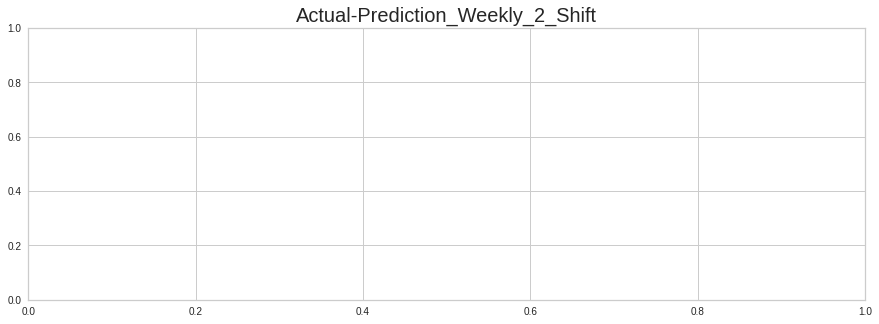

In [281]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_2_Shift",fontdict=font1)
plt.plot(Res["shift_2"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_2"].shape[0]):
    Mape.append((np.abs((Res["shift_2"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_2"].iloc[i])))

print("MAPE:",np.mean(Mape))
print("directional_acc=",directional_acc(Res["prediction_label"],Res["shift_2"],Tag_f.Value[-52:-2]))

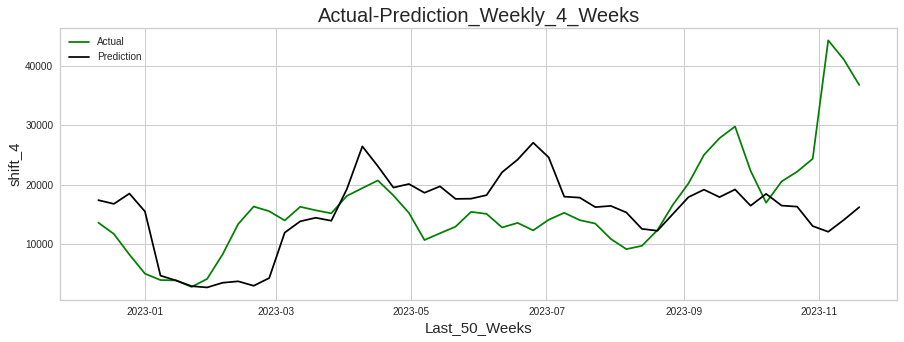

MAPE: 0.42098446990115035
directional_acc 74.0


In [285]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))
print("directional_acc",directional_acc(Res["prediction_label"],Res["shift_4"],Tag_f.Value[-54:-4]))

In [283]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [284]:
directional_acc(Res["prediction_label"],Res["shift_4"],Tag_f.Value[-54:-4])

74.0

In [144]:
Tag_f.Value[-52:-2].head()

Date
2022-12-25    19851.714286
2023-01-01    18749.000000
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
Freq: W-SUN, Name: Value, dtype: float64

In [146]:
Res["prediction_label"].head()

Date
2022-12-25    18819.245771
2023-01-01    16976.185776
2023-01-08    10808.057227
2023-01-15     8804.070061
2023-01-22     6230.188523
Name: prediction_label, dtype: float64

In [1738]:
# Res.to_csv("4_shift_reg_Cape_with_Targ.csv")

In [474]:
X_Final.columns

Index(['5TC_CCURMON', '5TC_C+1MON', '5TC_CCURQ', 'Value', 'Value_rollm_3',
       'Value_rollm_7', 'Value_ewm_7', 'EMA_Diff_28_14_7', 'EMA_Diff_35_21_14',
       'EMA_Value_ewm_3-Value_ewm_150', 'EMA_Value_ewm_3-Value_ewm_180',
       'EMA_Value_ewm_3-Value_ewm_210', 'EMA_Value_ewm_150-Value_ewm_7',
       'EMA_Value_ewm_210-Value_ewm_7', 'shift_2', '5TC_C+1MON_fshift_1',
       '5TC_C+1MON_rollm_3', '5TC_C+1MON_rollm_4', '5TC_C+1MON_rollm_6',
       '5TC_CCURQ_rollm_3', '5TC_C+1MON_ewm_3'],
      dtype='object')

In [512]:
Train=X_Final.iloc[:X_Final.shape[0]-50,:]
Test=X_Final.iloc[X_Final.shape[0]-50:,:]


In [513]:
Train.shape

(247, 21)

In [514]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(Train.drop("shift_2",axis=1))

In [515]:
Y_train = np.reshape(np.array(Train.shift_2), (-1,1))
Y_train= scaler.fit_transform(Y_train) 

In [516]:
X_train.shape

Train.shape

Train.shape

(247, 21)

In [517]:
Y_train.shape

(247, 1)

In [518]:
Y_test = np.reshape(np.array(Test.shift_2), (-1,1))
Y_test_S= scaler.fit_transform(Y_test) 

In [519]:
X_test = scaler.fit_transform(Test.drop("shift_2",axis=1))

X_test.shape

(50, 20)

In [520]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from keras.layers import LSTM

model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1],1),activation='tanh'))

# model.add(Dense(units=5))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=True,activation='tanh'))

# model1.add(LSTM(10,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# model = Sequential()

# model.add(LSTM(150,return_sequences=True,kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', batch_input_shape=(1,X_train.shape[1],1), stateful=True))
# model.add(Dropout(0.3))
# model.add(LSTM(25, batch_input_shape=(1,X_train.shape[1],1), kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',stateful=True))
# model.add(Dropout(0.3))
# model.add((Dense(1)))
# model.compile(loss='mse', optimizer='adam')


model.summary()

# from keras.callbacks import ModelCheckpoint,EarlyStopping
# file="weights.best_Baisc.hdf5"
# checkpoint = ModelCheckpoint(file, monitor='loss', verbose=1, save_best_only=True, mode='min')
# early_stop =  EarlyStopping(monitor='loss', min_delta=0.001, patience=200, verbose=1, mode='min')
# callbacks = [checkpoint,early_stop]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20, 150)           91200     
                                                                 
 lstm_3 (LSTM)               (None, 25)                17600     
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 108826 (425.10 KB)
Trainable params: 108826 (425.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [521]:
X_test_2 = scaler.fit_transform(Test.iloc[:,:])

In [522]:
model.fit(X_train, Y_train, epochs =150, batch_size = 2)

Epoch 1/150
124/124 [==============================] - 8s 31ms/step - loss: 0.0141
Epoch 2/150
124/124 [==============================] - 4s 31ms/step - loss: 0.0104
Epoch 3/150
124/124 [==============================] - 6s 46ms/step - loss: 0.0097
Epoch 4/150
124/124 [==============================] - 6s 50ms/step - loss: 0.0101
Epoch 5/150
124/124 [==============================] - 6s 45ms/step - loss: 0.0091
Epoch 6/150
124/124 [==============================] - 4s 30ms/step - loss: 0.0101
Epoch 7/150
124/124 [==============================] - 4s 30ms/step - loss: 0.0089
Epoch 8/150
124/124 [==============================] - 4s 32ms/step - loss: 0.0100
Epoch 9/150
124/124 [==============================] - 4s 31ms/step - loss: 0.0099
Epoch 10/150
124/124 [==============================] - 4s 29ms/step - loss: 0.0090
Epoch 11/150
124/124 [==============================] - 4s 29ms/step - loss: 0.0093
Epoch 12/150
124/124 [==============================] - 4s 29ms/step - loss: 0.0096
E

In [523]:
y_RNN = model.predict(X_test)


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7f58085a78b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7f58085a78b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 1s 12ms/step


In [524]:
inv_yhat = np.concatenate( [X_test,y_RNN], axis=1)

In [525]:
# # invert scaling for forecast

Y_Rnn_n = scaler.inverse_transform(inv_yhat)

In [526]:
Y_Rnn_n[:,-1]

array([ 9690.51902835, 10456.25686449, 10226.9831811 ,  9266.58196367,
        8580.65758814,  8335.43085421,  8056.63370671,  7979.88030917,
        8038.09197884,  7925.2894921 , 10555.30642224, 10463.70402304,
       10056.02599768,  9714.36722043, 10378.82233296, 13413.23634548,
       12565.36256673, 12122.52852568, 13079.47419984, 13479.3151961 ,
       15114.97430602, 13775.80193085, 12311.3850446 , 11109.13226078,
       12163.96769792, 11454.64171089, 11058.07534675, 10559.0641853 ,
       10020.62368338, 10319.55394581,  9785.34487162, 10170.58798563,
       10442.20294281, 10222.36521355, 10370.40680889,  9705.14706246,
        9848.09842799, 11116.56890124, 10888.76704929, 10950.09242429,
       10832.43636477, 16462.00369465, 12973.19029957, 12421.98767276,
       11934.31501268, 10606.74794777, 13268.14560037, 14388.34956644,
       15292.83731694, 13398.65266265])

In [527]:
inv_y = np.concatenate( [X_test,Y_test_S], axis=1)
inv_yy=scaler.inverse_transform(inv_y)
inv_yy[:,-1]

array([10541.84082373, 10002.74525503,  9018.26764588,  8108.8498791 ,
        7804.48322986,  7788.01457442,  7477.13329735,  7858.38064768,
        9028.46445465, 10471.91984927, 11312.7924015 , 11088.30075434,
       10649.59519583, 11299.76314585, 11132.00136337, 10988.88186878,
       11818.18185232, 12191.61974195, 12556.07472862, 11839.8298392 ,
       11007.81879936,  9713.87613658, 10037.82713284, 10350.2055604 ,
       11058.84330676, 10962.29733161, 10313.54560504, 10532.49374902,
       10174.18921844, 10682.24926203, 11013.76693781, 10663.43372203,
       10499.51597461,  9766.76196622,  9279.78342014,  9436.41773272,
       10183.9004649 , 11400.96242659, 12414.37145746, 13776.5760901 ,
       14573.90988739, 15130.68801735, 13018.28959624, 11494.39271017,
       12509.66306328, 12976.16706475, 13591.49591812, 19241.41817728,
       18331.91948345, 17109.27355505])

In [528]:
X_test

array([[0.35387593, 0.21992522, 0.28705139, 0.41176248, 0.48632499,
        0.53258564, 0.50821743, 0.47845493, 0.51736702, 0.42493981,
        0.42086232, 0.42081502, 0.58508221, 0.58760421, 0.23194355,
        0.18147131, 0.16467307, 0.17245692, 0.40556549, 0.22025528],
       [0.24148706, 0.09909447, 0.12631804, 0.3852128 , 0.55161627,
        0.58161615, 0.53960679, 0.44483287, 0.48877378, 0.45212587,
        0.44755291, 0.44720621, 0.55285969, 0.55674185, 0.23489439,
        0.14944906, 0.15205612, 0.15183928, 0.30952538, 0.16911394],
       [0.25642042, 0.1139107 , 0.15526492, 0.26050946, 0.51902401,
        0.51336038, 0.49119291, 0.49362276, 0.51090483, 0.35381856,
        0.35176378, 0.35271411, 0.59916875, 0.60100085, 0.10583931,
        0.10720322, 0.13209275, 0.11594288, 0.21518126, 0.13591884],
       [0.25195225, 0.11719642, 0.15665613, 0.2146847 , 0.41706556,
        0.34723892, 0.4186131 , 0.56864044, 0.55311745, 0.25906338,
        0.2591494 , 0.26106226, 0.66615515, 0

Text(0.5, 1.0, 'Basic LSTM_$_Layers_17_neuron each')

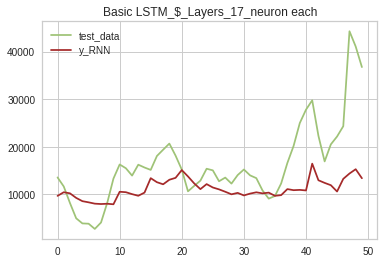

In [532]:
plt.plot(Y_test, label = "test_data", color = "g")
plt.plot(Y_Rnn_n[:,-1], label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic LSTM_$_Layers_17_neuron each")

In [530]:
Y_Rnn_n[:,-1]

array([ 9690.51902835, 10456.25686449, 10226.9831811 ,  9266.58196367,
        8580.65758814,  8335.43085421,  8056.63370671,  7979.88030917,
        8038.09197884,  7925.2894921 , 10555.30642224, 10463.70402304,
       10056.02599768,  9714.36722043, 10378.82233296, 13413.23634548,
       12565.36256673, 12122.52852568, 13079.47419984, 13479.3151961 ,
       15114.97430602, 13775.80193085, 12311.3850446 , 11109.13226078,
       12163.96769792, 11454.64171089, 11058.07534675, 10559.0641853 ,
       10020.62368338, 10319.55394581,  9785.34487162, 10170.58798563,
       10442.20294281, 10222.36521355, 10370.40680889,  9705.14706246,
        9848.09842799, 11116.56890124, 10888.76704929, 10950.09242429,
       10832.43636477, 16462.00369465, 12973.19029957, 12421.98767276,
       11934.31501268, 10606.74794777, 13268.14560037, 14388.34956644,
       15292.83731694, 13398.65266265])

In [531]:
X_test

array([[0.35387593, 0.21992522, 0.28705139, 0.41176248, 0.48632499,
        0.53258564, 0.50821743, 0.47845493, 0.51736702, 0.42493981,
        0.42086232, 0.42081502, 0.58508221, 0.58760421, 0.23194355,
        0.18147131, 0.16467307, 0.17245692, 0.40556549, 0.22025528],
       [0.24148706, 0.09909447, 0.12631804, 0.3852128 , 0.55161627,
        0.58161615, 0.53960679, 0.44483287, 0.48877378, 0.45212587,
        0.44755291, 0.44720621, 0.55285969, 0.55674185, 0.23489439,
        0.14944906, 0.15205612, 0.15183928, 0.30952538, 0.16911394],
       [0.25642042, 0.1139107 , 0.15526492, 0.26050946, 0.51902401,
        0.51336038, 0.49119291, 0.49362276, 0.51090483, 0.35381856,
        0.35176378, 0.35271411, 0.59916875, 0.60100085, 0.10583931,
        0.10720322, 0.13209275, 0.11594288, 0.21518126, 0.13591884],
       [0.25195225, 0.11719642, 0.15665613, 0.2146847 , 0.41706556,
        0.34723892, 0.4186131 , 0.56864044, 0.55311745, 0.25906338,
        0.2591494 , 0.26106226, 0.66615515, 0

Text(0.5, 1.0, 'Basic LSTM_$_Layers_150_neuron each')

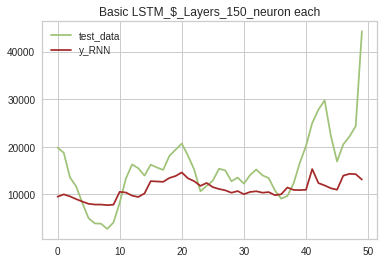

In [506]:
plt.plot(np.array(X_Final["Value"].iloc[-50:]), label = "test_data", color = "g")
plt.plot( Y_Rnn_n[:,-1], label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic LSTM_$_Layers_150_neuron each")

In [329]:
inv_yhat = np.concatenate( [X_test,y_RNN], axis=1)
inv_yhat

array([[0.58934391, 0.26050946, 0.26237876, ..., 1.        , 0.94117647,
        0.103622  ],
       [0.58934391, 0.2146847 , 0.11244804, ..., 1.        , 0.96078431,
        0.18736932],
       [0.58934391, 0.13100111, 0.        , ..., 1.        , 0.98039216,
        0.22336823],
       ...,
       [0.97625772, 1.        , 0.84737111, ..., 0.90909091, 0.84313725,
        0.43646538],
       [0.96676081, 0.92268984, 0.84737111, ..., 0.90909091, 0.8627451 ,
        0.48331115],
       [0.96676081, 0.81876122, 0.81637862, ..., 0.90909091, 0.88235294,
        0.54861224]])

In [330]:
# # invert scaling for forecast
inv_yhat = np.concatenate( [X_test,Y_Rnn_n[:,-1].reshape(-1,1)], axis=1)
Y_Rnn_n = scaler.inverse_transform(inv_yhat)



In [331]:
Y_Rnn_n[:,0]

array([18089.        , 18089.        , 18089.        , 16945.28571429,
       10083.        , 10083.        , 10083.        , 10083.        ,
        8050.85714286,  7238.        ,  7238.        ,  7238.        ,
       14176.57142857, 16952.        , 16952.        , 16952.        ,
       16338.28571429, 14804.        , 14804.        , 14804.        ,
       14804.        , 18982.        , 18982.        , 18982.        ,
       18982.        , 18043.14285714, 17339.        , 17339.        ,
       17339.        , 16229.28571429, 13455.        , 13455.        ,
       13455.        , 13455.        , 11512.71428571, 11189.        ,
       11189.        , 11189.        , 13509.71428571, 16604.        ,
       16604.        , 16604.        , 17896.28571429, 25650.        ,
       25650.        , 25650.        , 25650.        , 25212.85714286,
       25038.        , 25038.        ])

In [332]:
Tag_f["Value"].iloc[-50:]

Date
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
2023-01-29     4979.857143
2023-02-05     3905.285714
2023-02-12     3847.142857
2023-02-19     2749.571429
2023-02-26     4095.571429
2023-03-05     8226.571429
2023-03-12    13322.714286
2023-03-19    16291.428571
2023-03-26    15498.857143
2023-04-02    13950.000000
2023-04-09    16245.428571
2023-04-16    15653.142857
2023-04-23    15147.857143
2023-04-30    18075.714286
2023-05-07    19394.142857
2023-05-14    20680.857143
2023-05-21    18152.142857
2023-05-28    15214.714286
2023-06-04    10646.428571
2023-06-11    11790.142857
2023-06-18    12893.000000
2023-06-25    15394.857143
2023-07-02    15054.000000
2023-07-09    12763.571429
2023-07-16    13536.571429
2023-07-23    12271.571429
2023-07-30    14065.285714
2023-08-06    15235.714286
2023-08-13    13998.857143
2023-08-20    13420.142857
2023-08-27    10833.142857
2023-09-03     9113.857143
2023-09-10     9666.857143
2023-09-17    12305.857

In [333]:
X_Final["Value"].iloc[-50:]

Date
2022-12-11    13507.285714
2022-12-18    16186.142857
2022-12-25    19851.714286
2023-01-01    18749.000000
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
2023-01-29     4979.857143
2023-02-05     3905.285714
2023-02-12     3847.142857
2023-02-19     2749.571429
2023-02-26     4095.571429
2023-03-05     8226.571429
2023-03-12    13322.714286
2023-03-19    16291.428571
2023-03-26    15498.857143
2023-04-02    13950.000000
2023-04-09    16245.428571
2023-04-16    15653.142857
2023-04-23    15147.857143
2023-04-30    18075.714286
2023-05-07    19394.142857
2023-05-14    20680.857143
2023-05-21    18152.142857
2023-05-28    15214.714286
2023-06-04    10646.428571
2023-06-11    11790.142857
2023-06-18    12893.000000
2023-06-25    15394.857143
2023-07-02    15054.000000
2023-07-09    12763.571429
2023-07-16    13536.571429
2023-07-23    12271.571429
2023-07-30    14065.285714
2023-08-06    15235.714286
2023-08-13    13998.857143
2023-08-20    13420.142

In [334]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [335]:
directional_acc(pd.DataFrame(Y_Rnn_n[:,-1]).values,pd.DataFrame(Y_test).values,X_Final["Value"].iloc[-50:].values)

2582.0

In [336]:
Mape=[]
for i  in range(len(Y_Rnn_n[:,-1])):
    Mape.append((Y_test[i] - Y_Rnn_n[:,-1][i]) / X_Final["Value"].iloc[-50:][i])

print("MAPE:",np.mean(Mape))

MAPE: -27432.871566582893


In [337]:
pd.DataFrame(Y_Rnn_n[:,-1])

0
0   1.499569e+08
1   2.111037e+08
2   2.373878e+08
3   2.034522e+08
4   1.768357e+08
5   1.811203e+08
6   2.015297e+08
7   1.888777e+08
8   2.246659e+08
9   2.947726e+08
10  3.319687e+08
11  4.378865e+08
12  5.116076e+08
13  5.197210e+08
14  5.571692e+08
15  5.550470e+08
16  5.850797e+08
17  6.080375e+08
18  5.696401e+08
19  4.997347e+08
20  4.218635e+08
21  4.333332e+08
22  4.346303e+08
23  4.073970e+08
24  3.893416e+08
25  3.718315e+08
26  3.465048e+08
27  2.219048e+08
28  1.622459e+08
29  2.448935e+08
30  2.343050e+08
31  2.302978e+08
32  2.035452e+08
33  2.005621e+08
34  1.913361e+08
35  1.941008e+08
36  2.012675e+08
37  1.752382e+08
38  1.819809e+08
39  2.325479e+08
40  2.475317e+08
41  2.535341e+08
42  2.644200e+08
43  2.715394e+08
44  2.853899e+08
45  3.204408e+08
46  3.383167e+08
47  3.929773e+08
48  4.271810e+08
49  4.748596e+08